In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Laura Sofía Sierra Sánchez
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

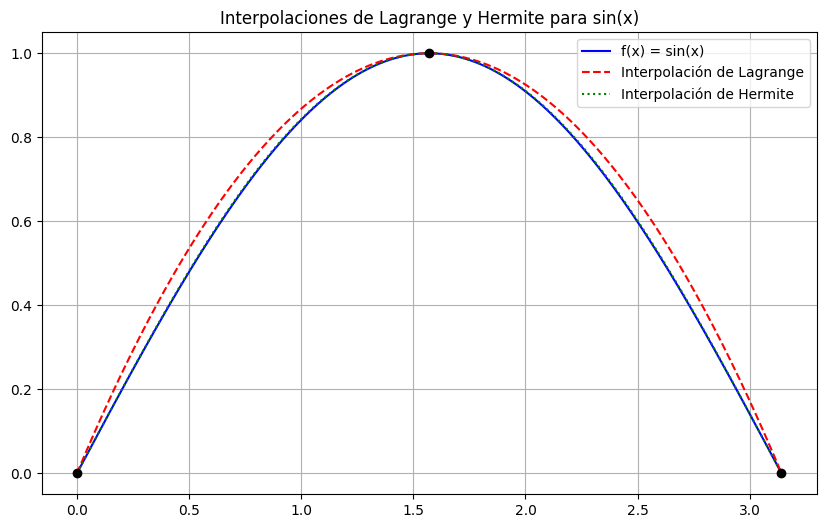

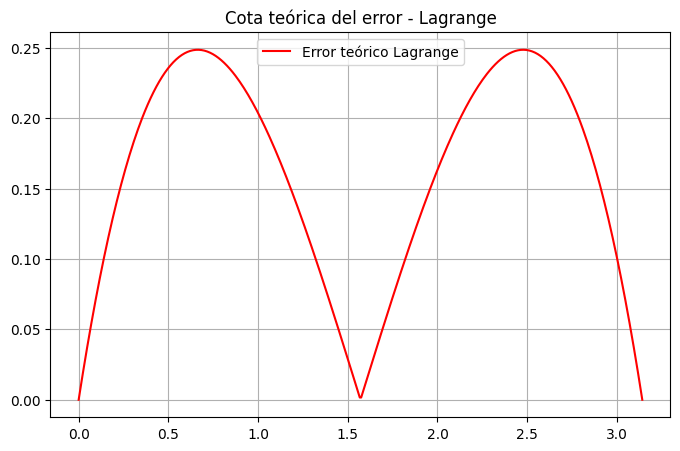

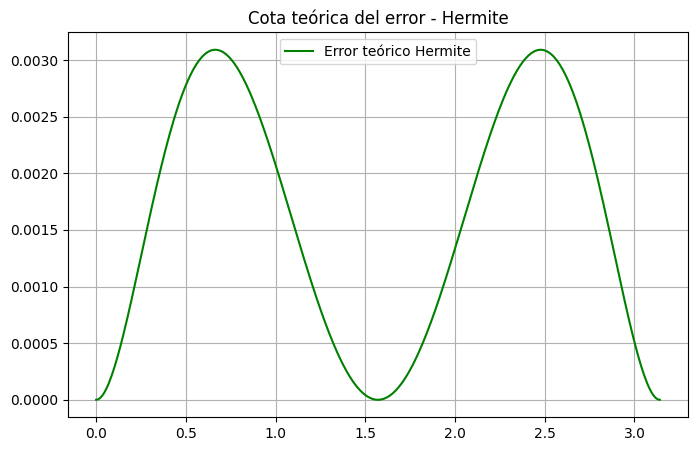

In [ ]:

from scipy.interpolate import KroghInterpolator # Se importa el método KroghInterpolator para realizar la interpolación de Hermite
from math import factorial

x_vals = np.array([0, np.pi / 2, np.pi])
y_vals = np.sin(x_vals)
dy_vals = np.cos(x_vals)

# INTERPOLACIÓN DE LAGRANGE
P_lagrange = lagrange(x_vals, y_vals)

# Error teórico de interpolación de Lagrange
def error_teorico_lagrange(x):
    n = len(x_vals) - 1
    deriv_max = 1
    prod = np.prod([x - xi for xi in x_vals], axis=0)
    return (deriv_max / factorial(n + 1)) * np.abs(prod)


# INTERPOLACIÓN DE HERMITE

# Duplicamos cada nodo: [x0,x0,x1,x1,...]
x_hermite = np.repeat(x_vals, 2)

# Alternamos valores y derivadas: [f(x0), f'(x0), f(x1), f'(x1), ...]
y_hermite = np.empty_like(x_hermite)
y_hermite[::2] = y_vals
y_hermite[1::2] = dy_vals

P_hermite = KroghInterpolator(x_hermite, y_hermite)

# Error teórico de Hermite
def error_teorico_hermite(x):
    n = len(x_vals) - 1
    deriv_max = 1
    prod = np.prod([(x - xi)**2 for xi in x_vals], axis=0)
    return (deriv_max / factorial(2 * n + 2)) * np.abs(prod)


x_plot = np.linspace(0, np.pi, 400)
f_plot = np.sin(x_plot)
P_plot_lagrange = P_lagrange(x_plot)
P_plot_hermite = P_hermite(x_plot)


plt.figure(figsize=(10, 6))
plt.plot(x_plot, f_plot, label='f(x) = sin(x)', color='blue')
plt.plot(x_plot, P_plot_lagrange, '--', label='Interpolación de Lagrange', color='red')
plt.plot(x_plot, P_plot_hermite, ':', label='Interpolación de Hermite', color='green')
plt.scatter(x_vals, y_vals, color='black', zorder=5)
plt.title('Interpolaciones de Lagrange y Hermite para sin(x)')
plt.legend()
plt.grid()
plt.show()

#Error teórico de Lagrange
plt.figure(figsize=(8, 5))
plt.plot(x_plot, error_teorico_lagrange(x_plot), label='Error teórico Lagrange', color='red')
plt.title('Cota teórica del error - Lagrange')
plt.legend()
plt.grid()
plt.show()

# === Error teórico de Hermite
plt.figure(figsize=(8, 5))
plt.plot(x_plot, error_teorico_hermite(x_plot), label='Error teórico Hermite', color='green')
plt.title('Cota teórica del error - Hermite')
plt.legend()
plt.grid()
plt.show()


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

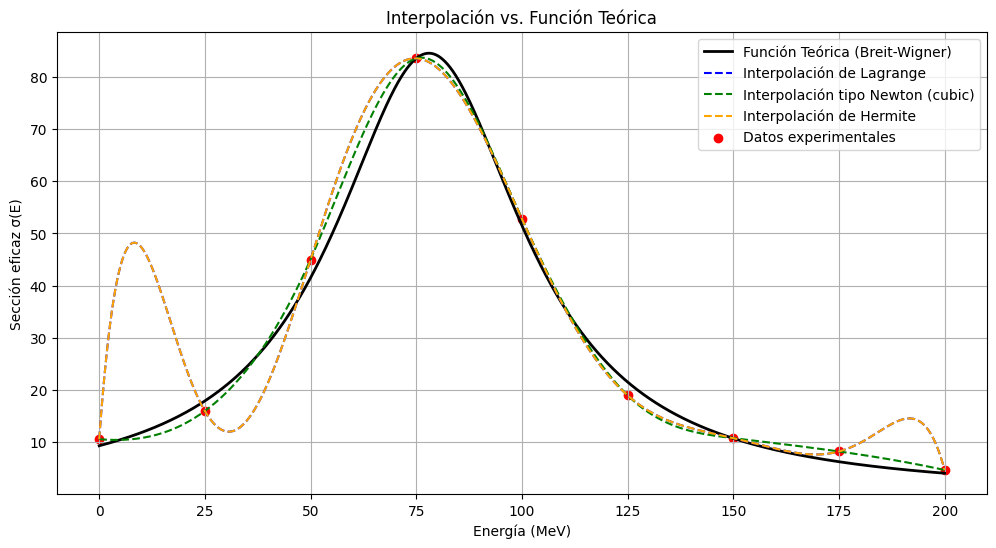

Error máximo Lagrange: 36.8911
Error máximo Newton (cubic): 5.4201
Error máximo Hermite: 36.8911


In [ ]:
# Datos del experimento
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.0, 10.8, 8.25, 4.7])

# Parámetros teóricos
Er = 78
Gamma = 55

# Cálculo de sigma0
idx_max = np.argmax(sigma_exp)
sigma0 = sigma_exp[idx_max] * ((Energia[idx_max] - Er)**2 + (Gamma**2)/4)

# Función teórica de Breit-Wigner
def sigma_teo(E):
    return sigma0 / ((E - Er)**2 + (Gamma**2)/4)

# Lagrange
lagrange_poly = lagrange(Energia, sigma_exp)

# Newton
newton_interp = interp1d(Energia, sigma_exp, kind='cubic', fill_value="extrapolate")

# 3. Hermite
hermite_interp = KroghInterpolator(Energia, sigma_exp)

# Dominio para graficar
E_vals = np.linspace(0, 200, 1000)
sigma_real = sigma_teo(E_vals)
sigma_lagrange = lagrange_poly(E_vals)
sigma_newton = newton_interp(E_vals)
sigma_hermite = hermite_interp(E_vals)

# Graficamos
plt.figure(figsize=(12,6))
plt.plot(E_vals, sigma_real, label='Función Teórica (Breit-Wigner)', color='black', linewidth=2)
plt.plot(E_vals, sigma_lagrange, '--', label='Interpolación de Lagrange', color='blue')
plt.plot(E_vals, sigma_newton, '--', label='Interpolación tipo Newton (cubic)', color='green')
plt.plot(E_vals, sigma_hermite, '--', label='Interpolación de Hermite', color='orange')
plt.scatter(Energia, sigma_exp, color='red', label='Datos experimentales')
plt.legend()
plt.title('Interpolación vs. Función Teórica')
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz σ(E)')
plt.grid()
plt.show()

# Cálculo de errores máximos |f(x) - P(x)|
error_lagrange = np.max(np.abs(sigma_real - sigma_lagrange))
error_newton = np.max(np.abs(sigma_real - sigma_newton))
error_hermite = np.max(np.abs(sigma_real - sigma_hermite))

print(f"Error máximo Lagrange: {error_lagrange:.4f}")
print(f"Error máximo Newton (cubic): {error_newton:.4f}")
print(f"Error máximo Hermite: {error_hermite:.4f}")

El método que mejor se ajusta a la función teórica de Breit-Wigner es la interpolación de Newton, ya que presentó el menor error máximo respecto a la función original.

# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

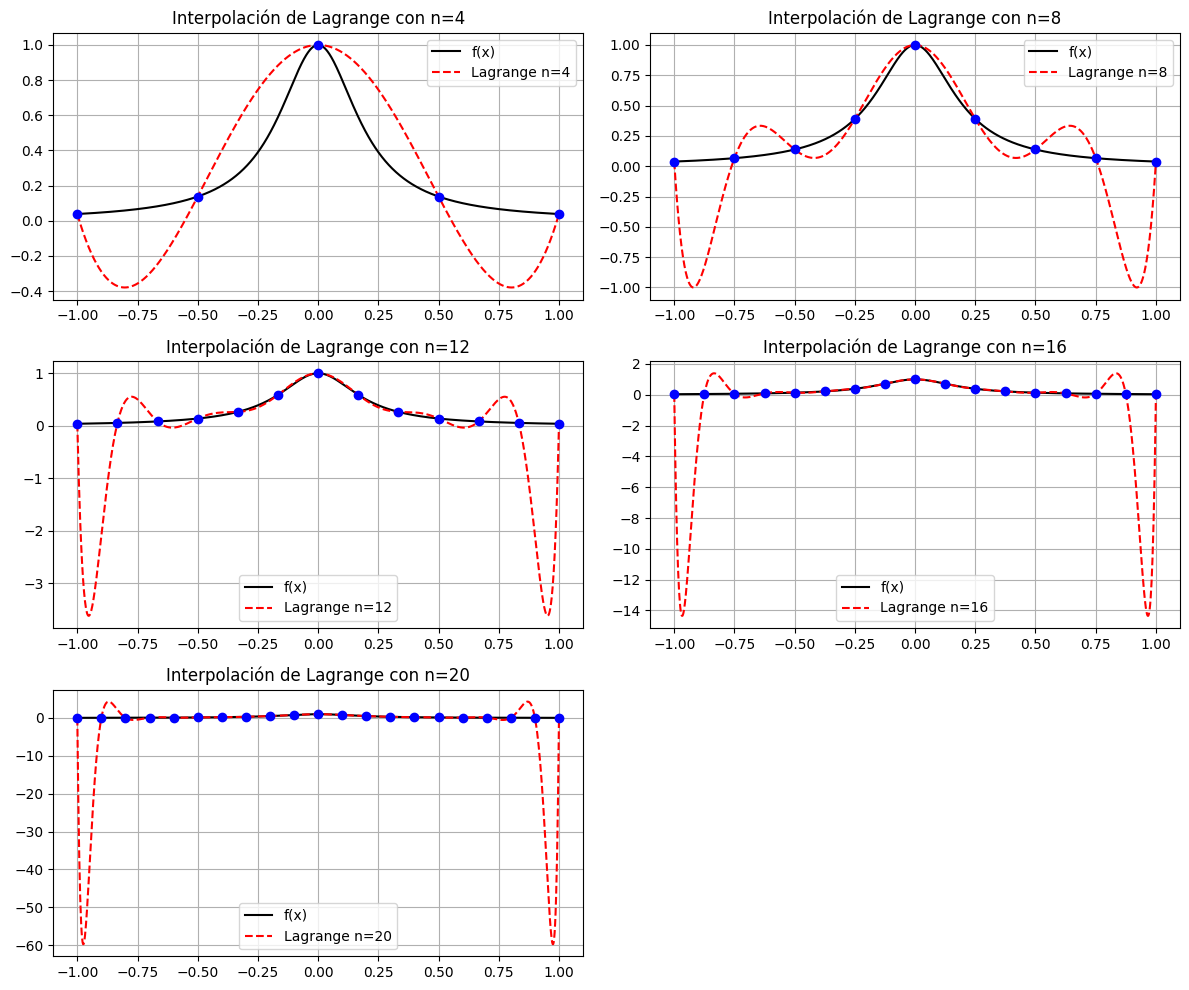

In [ ]:
# Función original
def f(x):
    return 1 / (1 + 25 * x**2)

# Puntos n
n_values = [4, 8, 12, 16, 20]
x_plot = np.linspace(-1, 1, 1000)
plt.figure(figsize=(12, 10))

for i, n in enumerate(n_values, 1):
    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)

    poly = lagrange(x_nodes, y_nodes)
    y_interp = poly(x_plot)

    plt.subplot(3, 2, i)
    plt.plot(x_plot, f(x_plot), 'k-', label='f(x)')
    plt.plot(x_plot, y_interp, 'r--', label=f'Lagrange n={n}')
    plt.plot(x_nodes, y_nodes, 'bo')
    plt.legend()
    plt.title(f"Interpolación de Lagrange con n={n}")
    plt.grid()

plt.tight_layout()
plt.show()

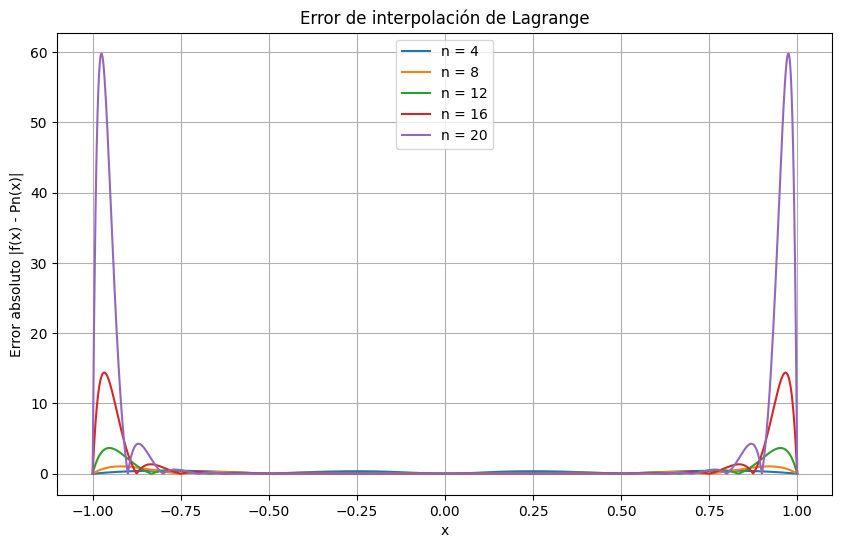

Cota superior teórica del error para n=4 en x=0.5: 0


In [3]:
from sympy import symbols, diff, lambdify, factorial

f = lambda x: 1 / (1 + 25 * x**2)

n_values = [4, 8, 12, 16, 20]
x_real = np.linspace(-1, 1, 1000)
y_real = f(x_real)

plt.figure(figsize=(10, 6))

# Para cada n, graficamos el error
for i, n in enumerate(n_values):
    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)
    poly = lagrange(x_nodes, y_nodes)
    y_interp = poly(x_real)
    error = np.abs(y_real - y_interp)

    plt.plot(x_real, error, label=f'n = {n}')

plt.title("Error de interpolación de Lagrange")
plt.xlabel("x")
plt.ylabel("Error absoluto |f(x) - Pn(x)|")
plt.legend()
plt.grid(True)
plt.show()

# Parte simbólica con sympy
x = symbols('x')
f_sym = 1 / (1 + 25 * x**2)
f_5 = diff(f_sym, x, 5)

# Convertir a función evaluable
f_5_fun = lambdify(x, f_5)
max_f5 = max(abs(f_5_fun(xi)) for xi in np.linspace(-1, 1, 1000))  # Máximo en [-1,1]

# Nodos de interpolación
x_nodes = np.linspace(-1, 1, 5)
x0 = 0.5  # Punto de evaluación

# Cálculo del producto |(x - x0)(x - x1)...(x - xn)|
product_term = np.prod([abs(x0 - xi) for xi in x_nodes])

# Cota del error teórico
n = 4
error_teorico = (max_f5 / factorial(n+1)) * product_term

print("Cota superior teórica del error para n=4 en x=0.5:", error_teorico)



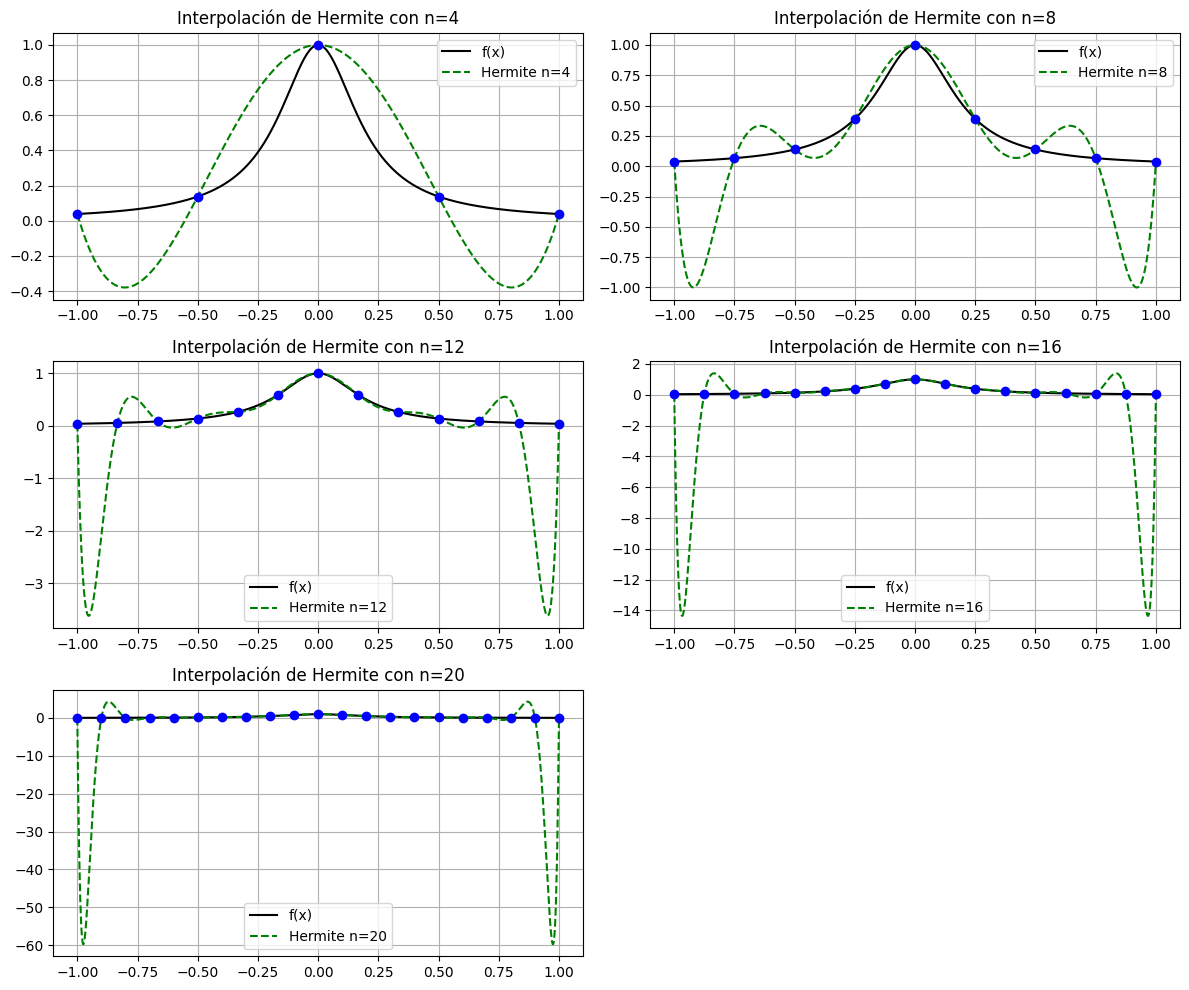

In [ ]:
from scipy.interpolate import KroghInterpolator

plt.figure(figsize=(12, 10))
for i, n in enumerate(n_values, 1):
    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)

    hermite = KroghInterpolator(x_nodes, y_nodes)
    y_interp = hermite(x_plot)

    plt.subplot(3, 2, i)
    plt.plot(x_plot, f(x_plot), 'k-', label='f(x)')
    plt.plot(x_plot, y_interp, 'g--', label=f'Hermite n={n}')
    plt.plot(x_nodes, y_nodes, 'bo')
    plt.legend()
    plt.title(f"Interpolación de Hermite con n={n}")
    plt.grid()

plt.tight_layout()
plt.show()

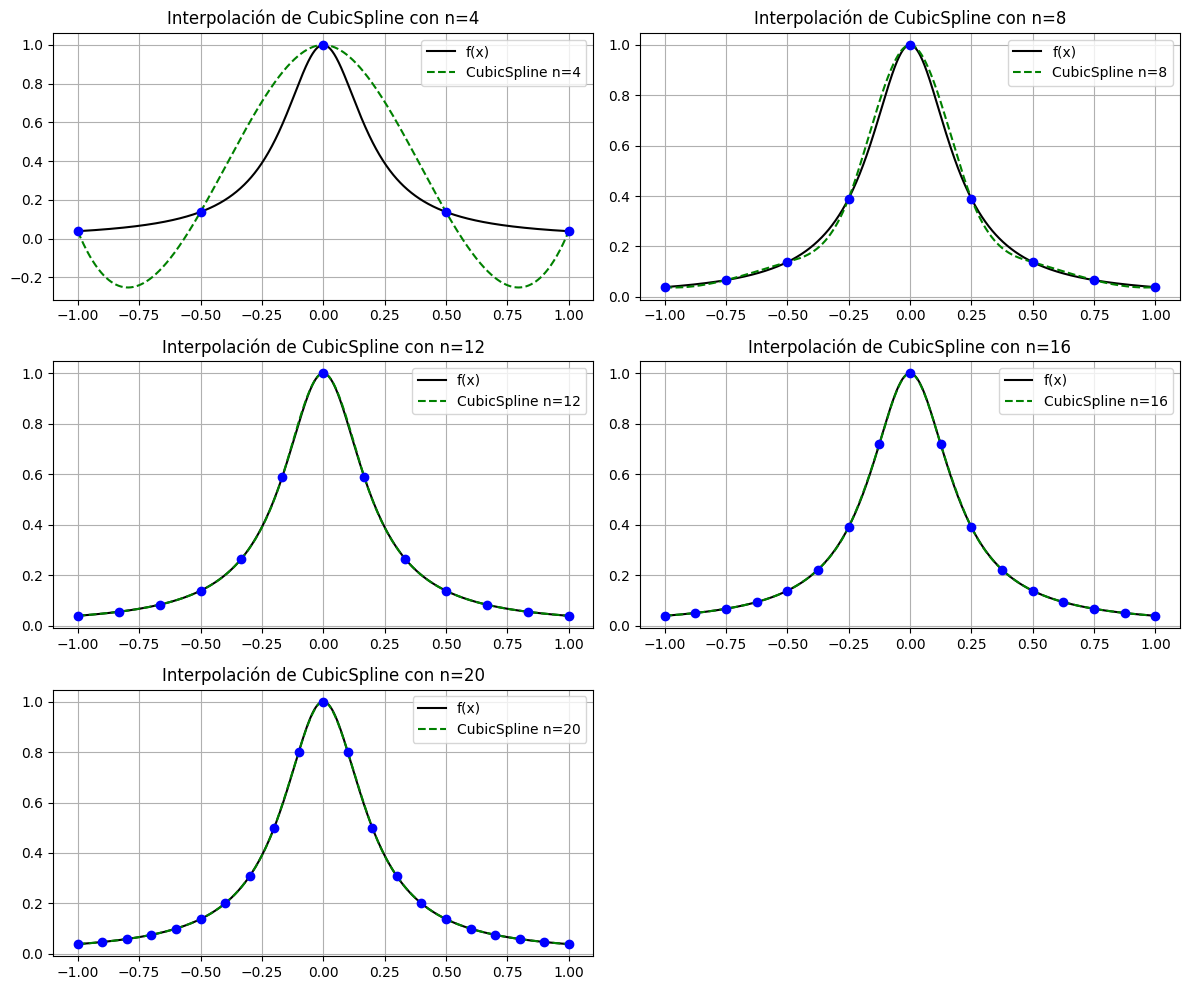

In [ ]:

n_values = [4, 8, 12, 16, 20]

x_plot = np.linspace(-1, 1, 1000)
f_plot = f(x_plot)
plt.figure(figsize=(12, 10))
for i, n in enumerate(n_values, 1):
    x_nodes = np.linspace(-1, 1, n + 1)
    y_nodes = f(x_nodes)
    cs = CubicSpline(x_nodes, y_nodes)
    y_interp = cs(x_plot)

    plt.subplot(3, 2, i)
    plt.plot(x_plot, f_plot, 'k-', label='f(x)')
    plt.plot(x_plot, y_interp, 'g--', label=f'CubicSpline n={n}')
    plt.plot(x_nodes, y_nodes, 'bo')
    plt.legend()
    plt.title(f"Interpolación de CubicSpline con n={n}")
    plt.grid()

plt.tight_layout()
plt.show()



# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

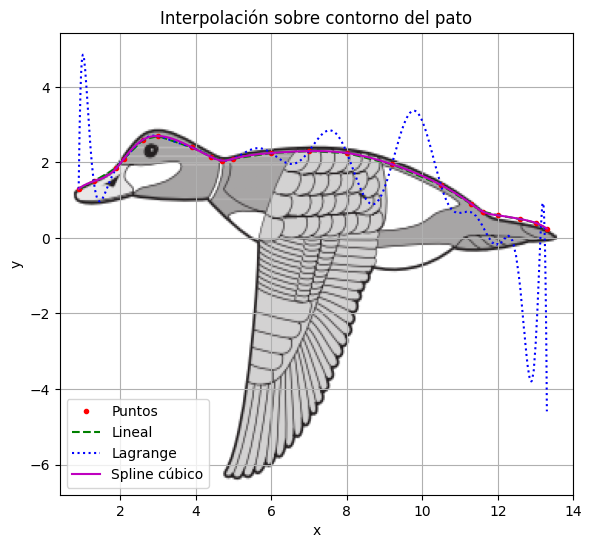

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, interp1d
import urllib.request

# Descargar y leer la imagen del pato
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png'
urllib.request.urlretrieve(pato, 'pato.jpg')
imagen_pato = plt.imread('pato.jpg')

# Puntos dados
xp = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0,
               6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
yp = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1,
               2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

# Interpolación
x_interp = np.linspace(min(xp), max(xp), 1000)

# Lineal
linear_interp = interp1d(xp, yp, kind='linear')
y_linear = linear_interp(x_interp)

# Lagrange
lagrange_poly = lagrange(xp, yp)
y_lagrange = lagrange_poly(x_interp)

# Spline cúbico
spline = CubicSpline(xp, yp)
y_spline = spline(x_interp)

plt.figure(figsize=(10, 6))
plt.title('Interpolación sobre contorno del pato')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label='Puntos')
plt.plot(x_interp, y_linear, '--g', label='Lineal')
plt.plot(x_interp, y_lagrange, ':b', label='Lagrange')
plt.plot(x_interp, y_spline, '-m', label='Spline cúbico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [ ]:
from sympy import symbols, simplify
x = np.array([-1, 0, 1, 2], dtype=float)
y = np.array([5, 3, 3, 4], dtype=float)
h = np.diff(x)  # [1.0, 1.0, 1.0]

#Construimos la matriz A y el vector b
A = np.array([
    [1, 0, 0, 0],
    [h[0], 2*(h[0]+h[1]), h[1], 0],
    [0, h[1], 2*(h[1]+h[2]), h[2]],
    [0, 0, 0, 1]
])

b = np.array([
    0,
    6*((y[2]-y[1])/h[1] - (y[1]-y[0])/h[0]),
    6*((y[3]-y[2])/h[2] - (y[2]-y[1])/h[1]),
    0
])

#Resolver para M (segundas derivadas)
M = np.linalg.solve(A, b)
print("Segundas derivadas M:", M)

# Construcción de los polinomios
def spline_poly(i, x_val):
    hi = x[i+1] - x[i]
    term1 = M[i+1] * (x_val - x[i])**3 / (6*hi)
    term2 = M[i]   * (x[i+1] - x_val)**3 / (6*hi)
    term3 = (y[i+1]/hi - M[i+1]*hi/6)*(x_val - x[i])
    term4 = (y[i]/hi - M[i]*hi/6)*(x[i+1] - x_val)
    return term1 + term2 + term3 + term4

# Mostrar los polinomios explícitamente para cada intervalo
x_sym = symbols('x')
polys = []
for i in range(3):
    hi = x[i+1] - x[i]
    Sx = (
        M[i+1] * (x_sym - x[i])**3 / (6*hi) +
        M[i]   * (x[i+1] - x_sym)**3 / (6*hi) +
        (y[i+1]/hi - M[i+1]*hi/6)*(x_sym - x[i]) +
        (y[i]/hi - M[i]*hi/6)*(x[i+1] - x_sym)
    )
    polys.append(simplify(Sx))
    print(f"S_{i}(x) =", polys[-1])

# Paso 5: Evaluar en x = 1.5 con CubicSpline de scipy
cs = CubicSpline(x, y, bc_type='natural')
print("\nSpline evaluado con CubicSpline en x=1.5:", cs(1.5))


Segundas derivadas M: [0.  2.8 0.8 0. ]
S_0(x) = -2.46666666666667*x + 0.466666666666667*(x + 1.0)**3 + 2.53333333333333
S_1(x) = -0.333333333333333*x**3 + 1.4*x**2 - 1.06666666666667*x + 3.0
S_2(x) = 1.13333333333333*x - 1.06666666666667*(0.5*x - 1)**3 + 1.73333333333333

Spline evaluado con CubicSpline en x=1.5: 3.45
